# Explore KITTI .npz data files

This notebook cell will load a sample `.npz` file from `data/KITTI/fcgf_train/` and print the internal keys, shapes and dtypes. Run the next cell to inspect contents interactively.

In [1]:
# Python cell: load and list .npz contents
import os
import numpy as np

# path to example file (adjust if you want another file)
example_path = 'data/KITTI/fcgf_train/drive0-pair14_25.npz'

if not os.path.exists(example_path):
    print(f"File not found: {example_path}")
    # list directory to help locate files
    folder = os.path.dirname(example_path)
    if os.path.exists(folder):
        print("Files in folder:")
        for f in sorted(os.listdir(folder))[:50]:
            print(' ', f)
else:
    data = np.load(example_path, allow_pickle=True)
    print('Loaded:', example_path)
    print('Available keys:', list(data.keys()))
    for k in data.keys():
        v = data[k]
        try:
            print(f" - {k}: shape={v.shape}, dtype={v.dtype}")
        except Exception:
            # some objects (if any) might be pickled python objects
            print(f" - {k}: type={type(v)}, repr={repr(v)[:200]}")
    # show a few examples for common keys
    for key in ['xyz0','xyz1','features0','features1','normal0','normal1','gt_trans']:
        if key in data:
            arr = data[key]
            print('\nSample of', key)
            print(' shape:', arr.shape)
            if arr.size > 0:
                # print first 5 rows
                flat = arr.reshape(-1, arr.shape[-1]) if arr.ndim >= 2 else arr.flatten()
                print(flat[:5])


Loaded: data/KITTI/fcgf_train/drive0-pair14_25.npz
Available keys: ['xyz0', 'xyz1', 'features0', 'features1', 'normal0', 'normal1', 'gt_trans']
 - xyz0: shape=(17860, 3), dtype=float32
 - xyz1: shape=(18375, 3), dtype=float32
 - features0: shape=(17860, 32), dtype=float32
 - features1: shape=(18375, 32), dtype=float32
 - normal0: shape=(17860, 3), dtype=float32
 - normal1: shape=(18375, 3), dtype=float32
 - gt_trans: shape=(4, 4), dtype=float32

Sample of xyz0
 shape: (17860, 3)
[[53.26689    8.375842   2.031389 ]
 [53.8885     8.647747   2.0533419]
 [53.079704   8.859661   2.0283031]
 [53.18931    9.049593   2.03227  ]
 [52.497906   9.102566   2.01026  ]]

Sample of xyz1
 shape: (18375, 3)
[[79.30287    6.7920446  2.902454 ]
 [79.62043    7.071006   2.9135122]
 [79.569984   7.318971   2.9135637]
 [78.902824  11.913331   2.9104922]
 [74.84349   12.0223055  2.775499 ]]

Sample of features0
 shape: (17860, 32)
[[ 0.19510436  0.11664576  0.12021176 -0.11350784  0.07008505 -0.04181869
   0

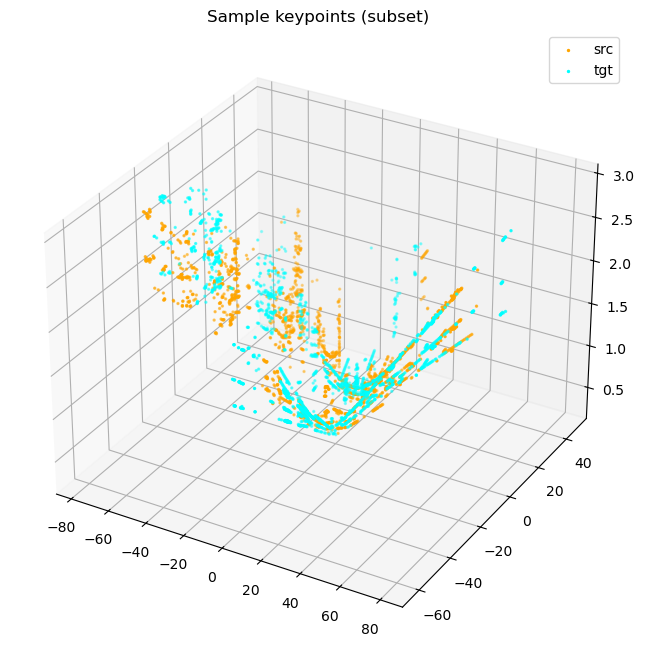


features0: shape=(17860, 32), dtype=float32
 mean=-0.000399, std=0.176776, min=-0.717340, max=0.652014

features1: shape=(18375, 32), dtype=float32
 mean=-0.002569, std=0.176758, min=-0.685389, max=0.684205


In [2]:
# Further analysis & quick visualization (3D scatter of keypoints)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

example_path = 'data/KITTI/fcgf_train/drive0-pair14_25.npz'
if not os.path.exists(example_path):
    print('Example file not found. Skipping visualization cell.')
else:
    data = np.load(example_path, allow_pickle=True)
    # pick src and tgt
    src = data['xyz0'] if 'xyz0' in data else None
    tgt = data['xyz1'] if 'xyz1' in data else None
    if src is not None and tgt is not None:
        # plot a subset to keep rendering fast
        n = min(2000, src.shape[0], tgt.shape[0])
        src_s = src[:n]
        tgt_s = tgt[:n]
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(src_s[:,0], src_s[:,1], src_s[:,2], c='orange', s=2, label='src')
        ax.scatter(tgt_s[:,0], tgt_s[:,1], tgt_s[:,2], c='cyan', s=2, label='tgt')
        ax.set_title('Sample keypoints (subset)')
        ax.legend()
        plt.show()
    else:
        print('Keypoint arrays not available for visualization.')

    # descriptor stats
    for k in ['features0','features1']:
        if k in data:
            arr = data[k]
            print(f"\n{k}: shape={arr.shape}, dtype={arr.dtype}")
            print(f" mean={np.mean(arr):.6f}, std={np.std(arr):.6f}, min={np.min(arr):.6f}, max={np.max(arr):.6f}")
